加载数据

In [1]:
import pandas as pd
data = pd.read_csv('../datasets/CCPP.csv')
print(data.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


数学建模

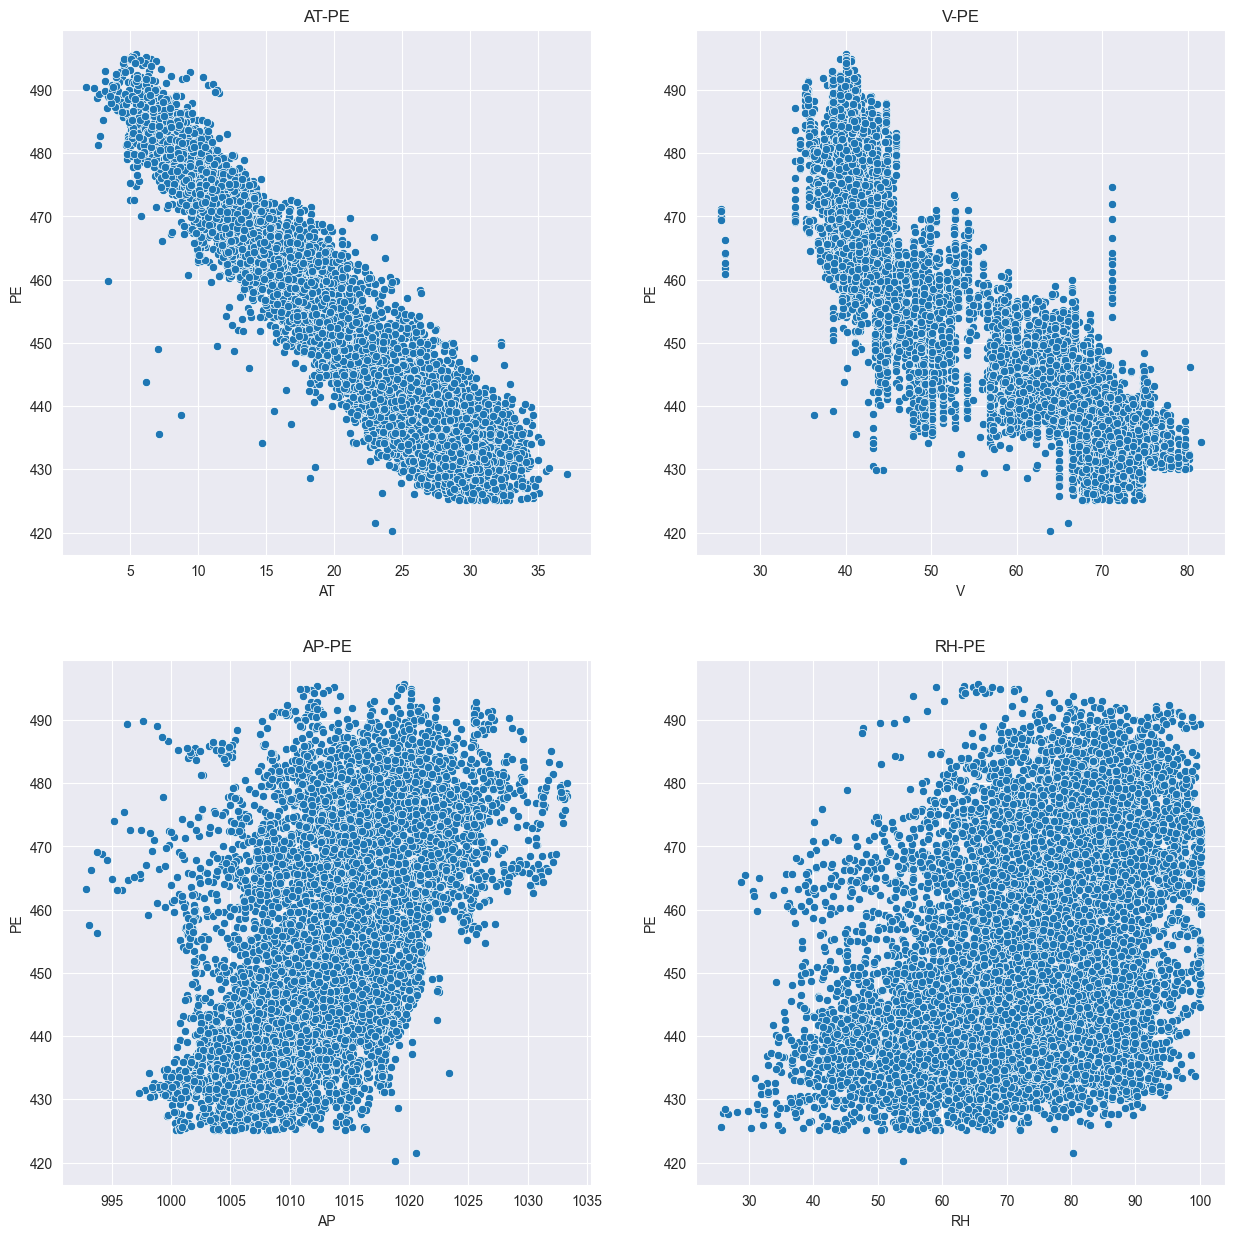

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(2,2,figsize=(15,15))

sns.scatterplot(x=data['AT'],y=data['PE'],ax=ax[0,0])
ax[0,0].set_title('AT-PE')

sns.scatterplot(x=data['V'],y=data['PE'],ax=ax[0,1])
ax[0,1].set_title('V-PE')

sns.scatterplot(x=data['AP'],y=data['PE'],ax=ax[1,0])
ax[1,0].set_title('AP-PE')

sns.scatterplot(x=data['RH'],y=data['PE'],ax=ax[1,1])
ax[1,1].set_title('RH-PE')

plt.show()

建立并使用10折交叉验证优化线性回归模型

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold, cross_val_score

x = data[['AT','V','AP','RH']]
y = data['PE']

lr = LinearRegression()

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

lr.fit(x,y)

print("回归系数:",lr.coef_)
print("截距:",lr.intercept_)

回归系数: [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
截距: 454.6092743153095


模型评估

In [4]:
import numpy as np

r2_scores = cross_val_score(lr, x, y, cv=kfold, scoring='r2')
print("K折交叉验证R²分数:")
print([f"{score:.4f}" for score in r2_scores])
print(f"平均R²分数: {np.mean(r2_scores):.4f}")

mse_scores = cross_val_score(lr, x, y, cv=kfold, scoring='neg_mean_squared_error')
print("\nK折交叉验证MSE:")
print([f"{-score:.2f}" for score in mse_scores])
print(f"平均MSE: {np.mean(-mse_scores):.2f}")

K折交叉验证R²分数:
['0.9333', '0.9269', '0.9228', '0.9352', '0.9164', '0.9285', '0.9383', '0.9228', '0.9283', '0.9320']
平均R²分数: 0.9285

K折交叉验证MSE:
['19.01', '21.53', '23.09', '19.09', '24.09', '19.76', '18.85', '22.19', '20.69', '19.76']
平均MSE: 20.81


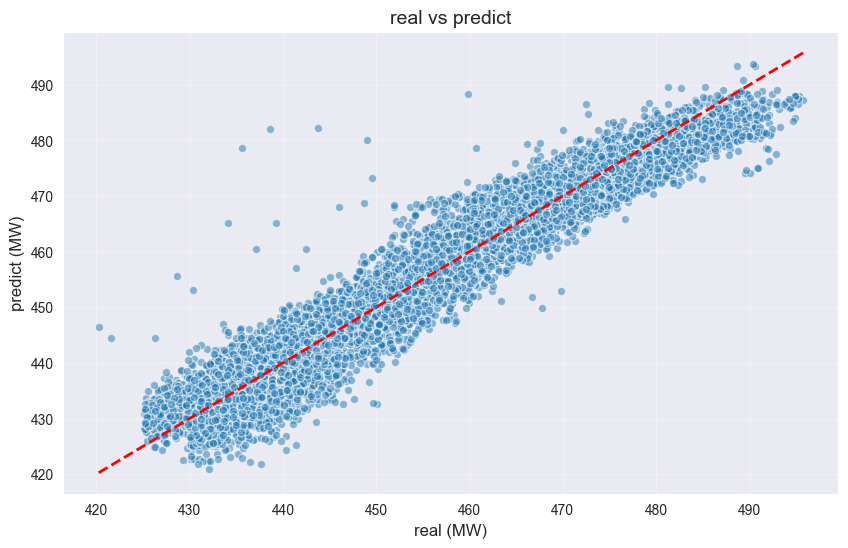

In [5]:
from sklearn.model_selection import cross_val_predict

plt.figure(figsize=(10, 6))
y_pred = cross_val_predict(lr, x, y, cv=kfold)
plt.scatter(y, y_pred, alpha=0.5, edgecolors='w')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('real vs predict', fontsize=14)
plt.xlabel('real (MW)', fontsize=12)
plt.ylabel('predict (MW)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

不使用优化

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr.fit(x_train, y_train)

print("回归系数:",lr.coef_)
print("截距:",lr.intercept_)

回归系数: [-1.98589969 -0.23209358  0.06219991 -0.15811779]
截距: 454.5691145894148


In [7]:
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("均方误差(MSE):",mse)
print("R² 分数:",r2)

均方误差(MSE): 20.273705999687436
R² 分数: 0.9301046431962188


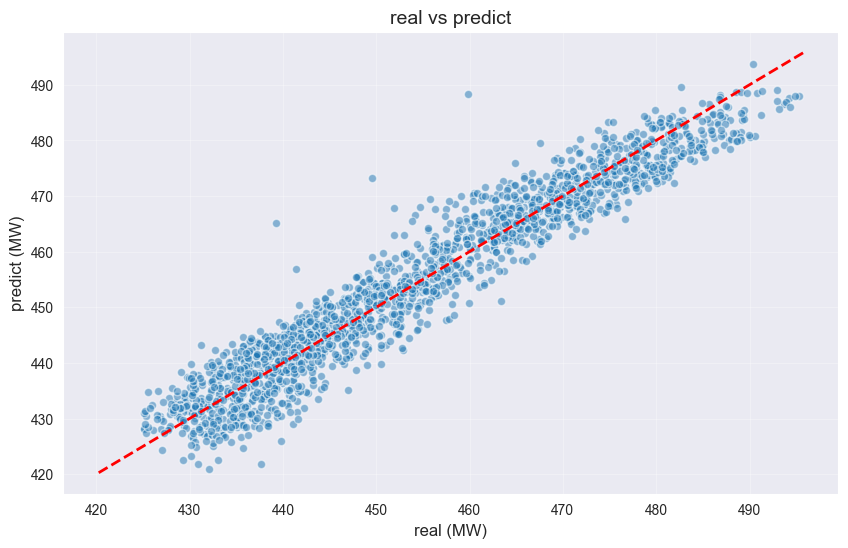

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('real vs predict', fontsize=14)
plt.xlabel('real (MW)', fontsize=12)
plt.ylabel('predict (MW)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()